In [1]:
import pandas as pd
from pandas import DataFrame, Series
#false positive warnings all the time:
pd.options.mode.chained_assignment = None

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import statistics

import os.path

In [2]:
#http://matplotlib.org/1.4.0/users/customizing.html

plt.style.use('ggplot')

mpl.rcParams['font.size'] = 18

### LINES
mpl.rcParams['lines.linewidth'] = '2.0'        # line width in points
mpl.rcParams['lines.marker']    = 'None'
mpl.rcParams['lines.markersize']=  '6'          # markersize, in points

###LEGEND
mpl.rcParams['legend.fontsize']='medium'

### GRIDS
mpl.rcParams['grid.color']='black'     # grid color
mpl.rcParams['grid.linestyle'] =':'    # dotted
mpl.rcParams['grid.linewidth']='0.5'   # in points
mpl.rcParams['grid.alpha']='1.0'       # transparency, between 0.0 and 1.0

### TICKS
mpl.rcParams['xtick.labelsize']="small"  # fontsize of the tick labels
mpl.rcParams['xtick.direction']="out"      # direction: in, out, or inout
mpl.rcParams['ytick.labelsize']="small"   # fontsize of the tick labels
mpl.rcParams['ytick.direction']="out"      # direction: in, out, or inout

### AXES
mpl.rcParams['axes.linewidth']  =  '1.0'    # edge linewidth
mpl.rcParams['axes.grid']       =  'True'   # display grid or not
mpl.rcParams['axes.titlesize']  =  'large'  # fontsize of the axes title
mpl.rcParams['axes.labelsize']  = 'large'  # fontsize of the x any y labels
mpl.rcParams['axes.facecolor']= 'white'     # axes background color

mpl.rcParams['figure.facecolor']= '1.0'     # figure facecolor; 0.75 is scalar gray

In [3]:
def generateSimulationID(tup):
    identifier = tup[0] \
            + "_N" + str(tup[1]) \
            + "_" + str(tup[2]) \
            + "_" + tup[3] \
            + "_" + tup[4] \
    
    extra = ""
    if len(tup[5]) !=0:
        extra = "_" + str(tup[5])
    
    return identifier+extra


simulation_map = {
    "Watdiv10M": "W10", "Watdiv100M": "W100", "Watdiv1000M": "W1000", "Ontoforce": "Ont"
}

def generateSimulationIDCompact(tup, pref_length=3):
    #pref_length = 3
    identifier = tup[0][:pref_length] \
            + "_N" + str(tup[1]) \
            + "_" + str(tup[2]) \
            + "_" + simulation_map[tup[3]] \
            + "_" + str(tup[4])[:pref_length] \
    
    extra = ""
    if len(tup[5]) !=0:
        extra = "_" + str(tup[5])
    
    return identifier+extra

# Previous results:

* The Ontoforce queries which no store can answer usually contain query paths => see Rev01_02 notebook => result is UNKNOWN = UNCERTAIN
* There are a number of queries which only Virtuoso solves => results is UNCERTAIN
* There are queries where some systems make an error!

# Idea: create a matrix plot 1,223 high and 6 width and use these to create a aggregated bar chart as a replacement for fig 7 in the paper!

* Color scheme:
    - Green: correct
    - Yellow: uncertain
    - Orange: incorrect 
    - Red: error
    - Blue: store crashed before query was offered
    
    
### Tryout    


In [4]:
def generateFilenameQueryEventsCorrect(bmtuple):
    fname = './csv_correct/' +  bmtuple[0] + "_N" + str(bmtuple[1]) + "_" + str(bmtuple[2]) + "_" + bmtuple[3] + "_" + bmtuple[4]
    if len(str(bmtuple[5])) != 0:
        fname = fname + "_" + str(bmtuple[5])
    return fname + "_queryevents_correct.csv"

In [5]:
bm_tup = ('GraphDB', 1, 64, 'Ontoforce', 'Optimized', '')
filename = generateFilenameQueryEventsCorrect(bm_tup)
df = pd.read_csv(filename, sep='\t')
df.head(n=5)

,sim_id,query_name,thread_id,thread_type,order_id,number_of_results,runtime,flag,correct
0,Gra_N1_64_Ont_Opt,queries/xzalt,1,warmup,1,0,0.030136,SUCCESS,CORRECT
1,Gra_N1_64_Ont_Opt,queries/xzalt,244,stress,311,-1,1200.000000,TIMEOUT,INCORRECT
2,Gra_N1_64_Ont_Opt,queries/xur,1,warmup,2,1,0.013250,SUCCESS,CORRECT
3,Gra_N1_64_Ont_Opt,queries/xur,243,stress,387,-1,1200.000000,TIMEOUT,INCORRECT
4,Gra_N1_64_Ont_Opt,queries/xur,244,stress,36,1,0.012660,SUCCESS,CORRECT


https://stackoverflow.com/questions/9707676/defining-a-discrete-colormap-for-imshow-in-matplotlib

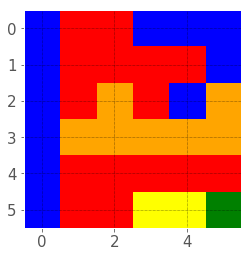

In [6]:
from matplotlib import colors

cmap = colors.ListedColormap(['blue', 'red', 'orange', 'yellow', 'green'])
bounds=np.array([1,10,100,1000,10000,100000]) -1
norm = colors.BoundaryNorm(bounds, cmap.N)

matrix = np.power(10,np.matrix([[0,1,1,0,0,0],[0,1,1,1,1,0],[0,1,2,1,0,2],[0,2,2,2,2,2],[0,1,1,1,1,1],[0,1,1,3,3,4]]))

plt.imshow(matrix, cmap=cmap, norm=norm)

In [7]:
df.pivot(index='query_name', columns='thread_id', values='flag')

thread_id,1,243,244,245,246,247
query_name,,,,,,
queries/xaa,SUCCESS,TIMEOUT,None,None,TIMEOUT,None
queries/xab,SUCCESS,TIMEOUT,TIMEOUT,None,TIMEOUT,TIMEOUT
queries/xac,SUCCESS,SUCCESS,None,None,TIMEOUT,None
queries/xad,SUCCESS,None,None,None,None,None
queries/xae,SUCCESS,None,TIMEOUT,TIMEOUT,None,TIMEOUT
queries/xaf,TIMEOUT,None,TIMEOUT,TIMEOUT,TIMEOUT,None
queries/xag,SUCCESS,TIMEOUT,None,None,None,TIMEOUT
queries/xah,SUCCESS,None,None,None,None,None
queries/xai,SUCCESS,SUCCESS,TIMEOUT,None,TIMEOUT,None


In [8]:
df['correct'].value_counts()

INCORRECT    2372
CORRECT      1583
Name: correct, dtype: int64

In [9]:
df['querystatus'] = 0
error     = df['flag'] == 'ERROR'
timeout   = df['flag'] == 'TIMEOUT'
success   = df['flag'] == 'SUCCESS'
uncertain = df['correct'] == 'UNCERTAIN'
incorrect = df['correct'] == 'INCORRECT'
correct   = df['correct'] == 'CORRECT'

unknown = pd.isnull(df['flag'])

In [10]:
df.loc[success & correct,'querystatus'] = 1e5

df.loc[error,'querystatus'] = 1e1
df.loc[timeout,'querystatus'] = 1e1

#2 unknown

df.loc[unknown, 'querystatus'] = 1e0
df.loc[unknown, 'thread_id'] = 1


df.loc[success & incorrect,'querystatus'] = 1e3
df.loc[success & uncertain,'querystatus'] = 1e4


In [11]:
df

,sim_id,query_name,thread_id,thread_type,order_id,number_of_results,runtime,flag,correct,querystatus
0,Gra_N1_64_Ont_Opt,queries/xzalt,1,warmup,1,0,0.030136,SUCCESS,CORRECT,100000.0
1,Gra_N1_64_Ont_Opt,queries/xzalt,244,stress,311,-1,1200.000000,TIMEOUT,INCORRECT,10.0
2,Gra_N1_64_Ont_Opt,queries/xur,1,warmup,2,1,0.013250,SUCCESS,CORRECT,100000.0
3,Gra_N1_64_Ont_Opt,queries/xur,243,stress,387,-1,1200.000000,TIMEOUT,INCORRECT,10.0
4,Gra_N1_64_Ont_Opt,queries/xur,244,stress,36,1,0.012660,SUCCESS,CORRECT,100000.0
5,Gra_N1_64_Ont_Opt,queries/xcl,1,warmup,3,1,0.055672,SUCCESS,CORRECT,100000.0
6,Gra_N1_64_Ont_Opt,queries/xcl,245,stress,152,-1,1200.000000,TIMEOUT,INCORRECT,10.0
7,Gra_N1_64_Ont_Opt,queries/xcl,244,stress,455,-1,1200.000000,TIMEOUT,INCORRECT,10.0
8,Gra_N1_64_Ont_Opt,queries/xcl,247,stress,187,-1,1200.000000,TIMEOUT,INCORRECT,10.0
9,Gra_N1_64_Ont_Opt,queries/xzatv,1,warmup,4,1,18.429951,SUCCESS,CORRECT,100000.0


In [12]:
pivot_table = df.pivot(index='query_name', columns='thread_id', values='querystatus')

In [13]:
pivot_table.fillna(1e0, inplace=True)

In [14]:
pivot_table['problems'] = pivot_table.sum(axis=1)
pivot_final = pivot_table.sort_values('problems', ascending=True)
pivot_final.drop('problems', inplace=True, axis=1)


In [15]:
if pivot_final.shape[1] < 6:
    print(pivot_final.shape[1])
    
    for i in range(pivot_final.shape[1], 6):
        pivot_final["123"+str(i)] = 2


In [16]:
pivot_final.reset_index().drop('query_name', inplace=True, axis=1)

In [17]:
pivot_final['0'] = np.nan

In [18]:
pivot_final = pivot_final[ [1] + ['0'] + list(pivot_final.columns[1:-1]) ]



https://stackoverflow.com/questions/13384653/imshow-extent-and-aspect

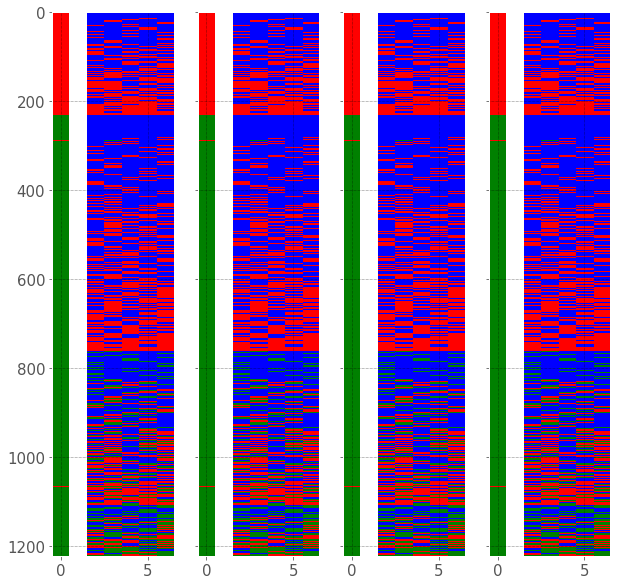

In [19]:
fig, ax = plt.subplots(1,4, figsize=(10,10), sharey=True)
ax[0].imshow(pivot_final.as_matrix(), aspect='auto', cmap=cmap, norm=norm)
ax[1].imshow(pivot_final.as_matrix(), aspect='auto', cmap=cmap, norm=norm)
ax[2].imshow(pivot_final.as_matrix(), aspect='auto', cmap=cmap, norm=norm)
ax[3].imshow(pivot_final.as_matrix(), aspect='auto', cmap=cmap, norm=norm)






In [20]:
pivot_final

thread_id,1,0,243,244,245,246,247
query_name,,,,,,,
queries/xzakf,10.0,NaN,1.0,1.0,1.0,1.0,1.0
queries/xbp,10.0,NaN,1.0,1.0,1.0,1.0,1.0
queries/xxf,10.0,NaN,1.0,1.0,1.0,1.0,1.0
queries/xgq,10.0,NaN,1.0,1.0,1.0,1.0,1.0
queries/xzakc,10.0,NaN,1.0,1.0,1.0,1.0,1.0
queries/xzaoz,10.0,NaN,1.0,1.0,1.0,1.0,1.0
queries/xzahj,10.0,NaN,1.0,1.0,1.0,1.0,1.0
queries/xmd,10.0,NaN,1.0,1.0,1.0,1.0,1.0
queries/xzapj,10.0,NaN,1.0,1.0,1.0,1.0,1.0


## Generate Plot

In [21]:
tuple_list = [('Blazegraph', 1, 64, 'Ontoforce', 'Optimized', ''), \
              ('ES', 1, 64, 'Ontoforce', 'Default', ''), \
              ('GraphDB', 1, 64, 'Ontoforce', 'Optimized', ''), \
              ('Virtuoso', 1, 64, 'Ontoforce', 'Optimized', ''), \
              ('Virtuoso', 1, 32,'Ontoforce', 'Optimized', 'VWall'), \
              ('Virtuoso', 3, 64,'Ontoforce', 'Optimized', '0'), \
              ('Virtuoso', 3, 64,'Ontoforce', 'Optimized', '2') \
             ]
pivots = []
for i, bm_tup in enumerate(tuple_list):
    filename = generateFilenameQueryEventsCorrect(bm_tup)
    
    df = pd.read_csv(filename, sep='\t')
    
    df['querystatus'] = 0
    error     = df['flag'] == 'ERROR'
    timeout   = df['flag'] == 'TIMEOUT'
    success   = df['flag'] == 'SUCCESS'
    uncertain = df['correct'] == 'UNCERTAIN'
    incorrect = df['correct'] == 'INCORRECT'
    correct   = df['correct'] == 'CORRECT'
    unknown = pd.isnull(df['flag'])
    
    #query status values are used in colormap and to sort the final dataframe
    df.loc[success & correct,'querystatus'] = 1e4

    df.loc[error,'querystatus'] = 1e1
    df.loc[timeout,'querystatus'] = 1e1

    df.loc[unknown, 'querystatus'] = 1e0
    #if thread is Nan -> overwrite with warmup thread ID
    df.loc[unknown, 'thread_id'] = 1
    
    df.loc[success & incorrect,'querystatus'] = 1e2
    df.loc[success & uncertain,'querystatus'] = 1e3
    
    pivot_table = df.pivot(index='query_name', columns='thread_id', values='querystatus')
    pivot_table.fillna(1e0, inplace=True)
    
    #sort the frame on problem type and frequency
    pivot_table['problems'] = pivot_table.sum(axis=1)
    pivot_final = pivot_table.sort_values('problems', ascending=True)
    pivot_final.drop('problems', inplace=True, axis=1)
    
    #if threads are missing 
    if pivot_final.shape[1] < 6:
        print(pivot_final.shape[1])
    
        for i in range(pivot_final.shape[1], 6):
            pivot_final["123"+str(i)] = 1e0
    
    
    pivot_final.reset_index().drop('query_name', inplace=True, axis=1)
    
    #for the figure: add a Nan bar in the matrix between warmup and stress test
    pivot_final['0'] = np.nan
    pivot_final = pivot_final[ [1] + ['0'] + list(pivot_final.columns[1:-1]) ]

    pivots.append(pivot_final)

    
    

1


https://matplotlib.org/examples/color/named_colors.html

In [22]:
from matplotlib import colors

cmap = colors.ListedColormap(['whitesmoke', 'red', 'orange', 'yellow', 'green'])
bounds=np.array([1,10,100,1000,10000,100000]) -1
norm = colors.BoundaryNorm(bounds, cmap.N)

FileNotFoundError: [Errno 2] No such file or directory: './img/ForPaper/Fig9_FailuresOntoforceBM.eps'

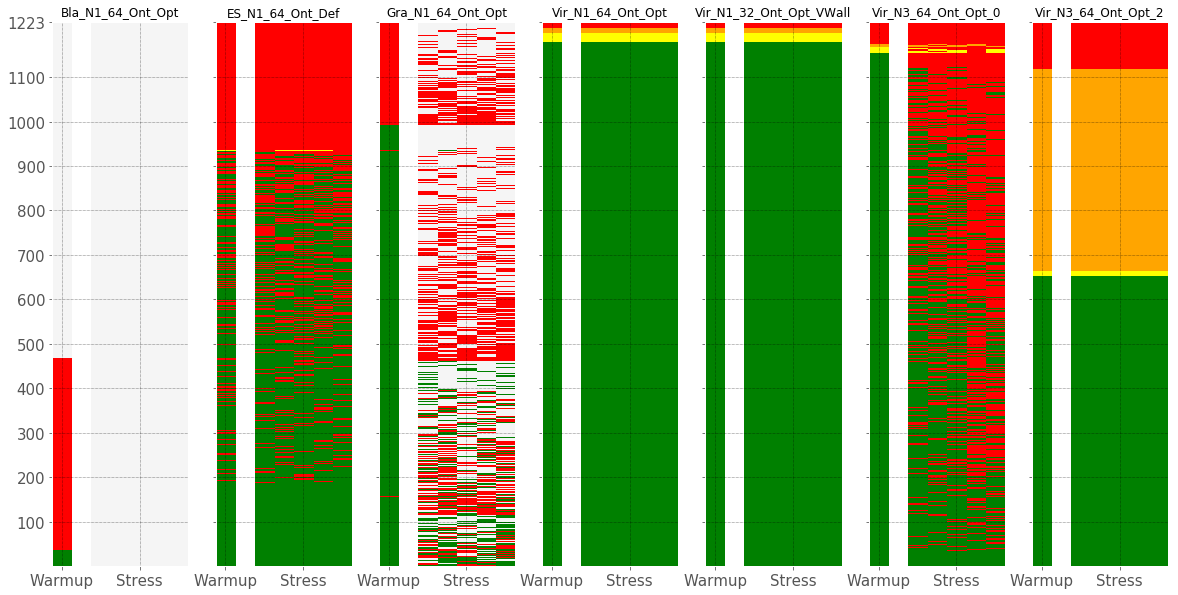

In [23]:
fig, ax = plt.subplots(1,len(pivots),figsize=(20,10), sharey=True)

for i, piv in enumerate(pivots):
    ax[i].imshow(piv.as_matrix(), aspect='auto', cmap=cmap, norm=norm)
    ax[i].set_xticks([0,4])
    ax[i].set_xticklabels(['Warmup', 'Stress'])
    ax[i].set_title(generateSimulationIDCompact(tuple_list[i]), fontsize=12)
    ax[i].set_yticks([0] + list(np.arange(123,1200,100)))
    ax[i].set_yticklabels([1223] + list(np.arange(1100,0,-100)))

filename = './img/ForPaper/Fig9_FailuresOntoforceBM'
plt.savefig(filename+'.eps', format='eps', bbox_inches='tight', rasterized=True, dpi=50) 
plt.savefig(filename+'.svg', format='svg', bbox_inches='tight', dpi=1200) 
plt.savefig(filename+'.pdf', format='pdf', bbox_inches='tight', dpi=1200) 


In [ ]:
pivots[6].head(n=100)